# Importing all the necessary libraries 

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading the Data 

In [209]:
Data = pd.read_csv(r"C:\Users\navee\Machine learning Projects\Health Insurance Cost Prediction\insurance.csv")
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [210]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [211]:
Data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [212]:
Data.shape

(1338, 7)

In [213]:
print('Number of Rows',Data.shape[0])
print('Number of Columns',Data.shape[1])

Number of Rows 1338
Number of Columns 7


In [214]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking Null values of a data set

In [215]:
Data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking overall statistics of a data set 

In [216]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Converting String columns to Numerical values 

In [217]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [218]:
Data['sex'].unique()

array(['female', 'male'], dtype=object)

In [219]:
Data['sex'] = Data['sex'].map({'female':0,'male':1})

In [220]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [221]:
Data['smoker'] = Data['smoker'].map({'no':0,'yes':1})

In [222]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [223]:
Data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [224]:
Data['region'] = Data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [225]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


# Storing Feature matrix in X and response(target) in y 

In [226]:
Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [227]:
X = Data.drop(['charges'],axis=1)

In [228]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [229]:
y = Data['charges']


In [230]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train / test split

In [231]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,3
1285,47,0,24.320,0,0,4
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,4
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,4
860,37,0,47.600,2,1,1


In [234]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

# Importing the Models

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training 

In [236]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm =  SVR()
svm.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gbr =  GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

# Prediction on Test Data 

In [237]:
y_pred1 = lr.predict(X_test)

y_pred2 = svm.predict(X_test)

y_pred3 = rfr.predict(X_test)

y_pred4 = gbr.predict(X_test)



In [238]:
Df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rfr':y_pred3,'gbr':y_pred4})
Df1

,Actual,lr,svm,rfr,gbr
764,9095.06825,8924.407244,9548.261584,10928.760037,11001.128629
887,5272.17580,7116.295018,9492.515425,5011.548638,5840.174656
890,29330.98315,36909.013521,9648.758701,28309.225337,28001.980112
1293,9301.89355,9507.874691,9555.044136,10691.246862,9745.291602
259,33750.29180,27013.350008,9420.421978,34778.697983,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46955.954115,45431.423211
575,12222.89830,11814.555568,9625.431547,12384.246653,12465.025294
535,6067.12675,7638.107736,9504.168517,6467.170282,6974.336525
543,63770.42801,40959.081722,9605.004594,46656.871984,47862.047791


# Comparing Performance viusually 

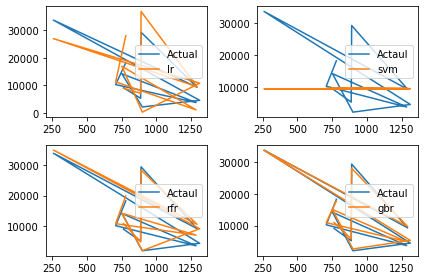

In [239]:
plt.subplot(221)
plt.plot(Df1['Actual'].iloc[0:11], label='Actual')
plt.plot(Df1['lr'].iloc[0:11], label='lr')
plt.legend()

plt.subplot(222)
plt.plot(Df1['Actual'].iloc[0:11], label='Actaul')
plt.plot(Df1['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(223)
plt.plot(Df1['Actual'].iloc[0:11], label='Actaul')
plt.plot(Df1['rfr'].iloc[0:11], label='rfr')
plt.legend()


plt.subplot(224)
plt.plot(Df1['Actual'].iloc[0:11], label='Actaul')
plt.plot(Df1['gbr'].iloc[0:11], label='gbr')
plt.legend()

plt.tight_layout()


# Evaluating the Algorithm

In [240]:
from sklearn import metrics

In [241]:
score_lr = metrics.r2_score(y_test,y_pred1)
score_svm = metrics.r2_score(y_test,y_pred2)
score_rfr = metrics.r2_score(y_test,y_pred3)
score_gbr = metrics.r2_score(y_test,y_pred4)

In [242]:
print(f'LR r2 score is {score_lr}')
print(f'SVM r2 score is {score_svm}')
print(f'RFR r2 score is {score_rfr}')
print(f'GBR r2 score is {score_gbr}')

LR r2 score is 0.7833463107364538
SVM r2 score is -0.07229762787861826
RFR r2 score is 0.8634286335299969
GBR r2 score is 0.8779936181637191


In [243]:
# Checking mean absolute error 
mae_lr = metrics.mean_absolute_error(y_test,y_pred1)
mae_svm = metrics.mean_absolute_error(y_test,y_pred2)
mae_rfr = metrics.mean_absolute_error(y_test,y_pred3)
mae_gbr = metrics.mean_absolute_error(y_test,y_pred4)

In [244]:
print(f'LR Mean Absolute Error is {mae_lr}')
print(f'SVM Mean Absolute Error is {mae_svm}')
print(f'RFR Mean Absolute Error is {mae_rfr}')
print(f'GBR Mean Absolute Error is {mae_gbr}')

LR Mean Absolute Error is 4186.5088983664355
SVM Mean Absolute Error is 8592.428727899724
RFR Mean Absolute Error is 2483.5045717961143
GBR Mean Absolute Error is 2447.167158715136


# Predictting Charges for New Customer 

In [245]:
Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [246]:
data = {'age':28,
        'sex':1,
        'bmi':40.50,
        'children':0,
        'smoker':1,
        'region':2}

In [247]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,28,1,40.5,0,1,2


In [248]:
new_pred = gbr.predict(df)
new_pred

array([41498.19575822])

# Saving the Model 

In [249]:
gbr =  GradientBoostingRegressor()
gbr.fit(X, y)

GradientBoostingRegressor()

In [250]:
import joblib 


In [251]:
joblib.dump(gbr,'gbr_model')

['gbr_model']

In [252]:
# loding the model again 

Model_gbr = joblib.load('gbr_model')

In [253]:
Model_gbr.predict(df)

array([41322.94449077])

# GUI

In [254]:
from tkinter import *

In [255]:
import joblib

In [256]:
master = Tk()
master.title('Insurance Cost Prediction')
label = Label(master, text=' Insurance Cost Prediction', bg='black', fg='white').grid(row=0,columnspan=2)

Label(master, text=' Enter Your age').grid(row=1)
Label(master, text=' Enter Your sex [1/0]').grid(row=2)
Label(master, text=' Enter Your bmi').grid(row=3)
Label(master, text=' Enter Your children').grid(row=4)
Label(master, text=' Enter Your smoker[1/0]').grid(row=5)
Label(master, text=' Enter Your region[1-4]').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)



def show_entry():

    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())


    model = joblib.load('gbr_model')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master, text='Insurance Cost').grid(row=7)
    Label(master,text=result).grid(row=8)


Button(master, text='Predict', command=show_entry).grid()



master.mainloop()

c:\Users\navee\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
